The following script consists of a Python version of Andrew Ng Stanford Course 'Machine Learning' taught on the Coursera Platform
Note: All exercise data and structure are credited to Stanford University 

**Caveat:** Contrary to the modularity presented in Octave scripts and as I'm using Jupyter Notebooks for educational purposes we will implement the functions on the same notebook where we will call them

# Exercise 1 - Plotting the Data

In [1]:
# Import numpy libraries to deal with matrixes and vectors
import numpy as np
# Import pandas do read data files
import pandas as pd
# Import matplotlib to plot data
import matplotlib.pyplot as plt

# Import math 
import math 

# Import scipy optimization function
from scipy import optimize

# Matplotlib notebook property
%matplotlib inline

In [2]:
#Read Text File and create X and y variables
ex2_file = pd.read_csv('ex2data1.txt', header=None) 
X = np.array(ex2_file.iloc[:,0:2])
y = np.array(ex2_file.iloc[:,2])

print('# of training examples: {}'.format(len(X)))
m = len(X)

# of training examples: 100


In [5]:
def plotData(
    X: np.array,
    y: np.array
) -> None:
    """
    Plots scatter plot of 2-d X array
    using y values as differente markers.
    
    Args:
        X(np.array): The array with x1 and x2 values.
        y(np.array): value of the outcome/target
        
    Returns:
        None
    
    """
    plt.scatter(X[y==0,0], X[y == 0,1], marker='o', facecolors='none', edgecolors='purple')
    plt.scatter(X[y==1,0], X[y == 1,1], marker='+', c='yellow')
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')
    plt.legend(('Admitted','Not admitted'), loc='best', bbox_to_anchor=(1, 0.5))

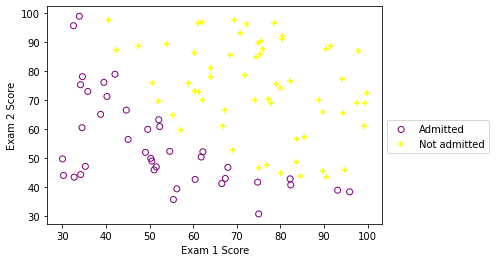

In [6]:
# Plot our data showing + marker for positive examples and 'o' marker for negative ones
plotData(X,y)

**This data is based on the following problem (stated on Andrew's course):**
                                             
"Suppose that you are the administrator of a university department and
you want to determine each applicant's chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant's scores on two exams and the admissions
decision.
Your task is to build a classification model that estimates an applicant's
probability of admission based the scores from those two exams."


Recall that our cost function for linear regression was (hypothesis - real value of y) squared. 
<br>
For binary classification the cost function is different and so is the hypothesis!
<br> The hypothesis gets plugged as in a sigmoid function bringing the value between 0 and 1 (you are really interested in probability of a specific event being true in classification).
<br>
The formulas to calculate the hypothesis are thus:

<img src="assets/Hypothesis.JPG">
<br>
**Where g is the sigmoid function:**
<br>
<img src="assets/Sigmoid.JPG">

The cost function is the binary log loss cost function (notice how it penalizes false positives and false negatives in the same way):

<img src="assets/CostFunction.JPG">

# Exercise 2 - Compute cost and gradient

In [8]:
# Retrieving number of rows and columns from data frame 
m, n = X.shape[0], X.shape[1]

In [9]:
# Add column of ones to the array X 
ones_vector = np.ones((len(X),1))
X_extended = np.hstack((ones_vector,X))

In [10]:
# Initialize Theta
initial_theta = np.zeros(n+1).reshape(3,1)

In [16]:
# Define sigmoid function 
def sigmoid(
    x: np.array
)-> [float, np.array]:
    """
    Computes sigmoid value of array x
    
    Args:
        x(np.array): Array with original hypothesis
    Returns:
        (np.array): Array with the resulting sigmoid
    """
    return(1 / (1 + np.exp(-x)))

# Defining cost function for logistic regression binary targets
def costFunction(
    theta: np.array, 
    X: np.array, 
    y: np.array
)-> [np.array,np.array]:
    """
    Computes cost function and resulting gradient 
    using log loss average.
    
    Args:
        theta(np.array): Original theta
        X(np.array): Original data with exam 1 and exam 2 scores
        y(np.array): Target variable with admission/no admission
    
    Returns:
        J(np.array): Array of 1 element with average log loss error function
        grad(np.array): Array of theta gradient after gradient descent
    """
    m = len(X)
    # Calculate the hypothesis for y=0 and y=1
    
    hypothesis =np.log(sigmoid(np.dot(theta.T,X.T)))
    
    hypothesisnegation =np.log(1-sigmoid(np.dot(theta.T,X.T)))
    
    # Calculate average log loss function
    
    J = (np.dot(-y.T.reshape(1,len(y)), hypothesis.T) - np.dot((1-y).T.reshape(1,len(y)), hypothesisnegation.T))/m
    
    # Compute gradients for Theta 
    
    grad = np.dot(sigmoid(np.dot(theta.T,X.T))-y.T.reshape(1,100),X)/m
    
    return J, grad

In [13]:
cost, grad = costFunction(initial_theta, X_extended, y)

In [14]:
print('Cost at initial theta: \n is {}'.format(float(cost)))
print('Gradient at initial theta: \n is {}'.format(grad))

Cost at initial theta: 
 is 0.6931471805599453
Gradient at initial theta: 
 is [[ -0.1        -12.00921659 -11.26284221]]


**Our cost function for an initial arbitrary theta is aproximately 0.69.**

In [17]:
# Testing the logistic regression for a different theta
test_theta = np.array((-24, 0.2, 0.2))
cost, grad = costFunction(test_theta, X_extended, y)

In [18]:
print('Cost at test theta: \n is {}'.format(float(cost)))
print('Gradient at test theta: \n is {}'.format(grad))

Cost at test theta: 
 is 0.21833019382659785
Gradient at test theta: 
 is [[0.04290299 2.56623412 2.64679737]]


**Our cost function for another arbitrary theta is aproximately 0.22 - just by random tweeking theta0 and theta1 we have lowered our cost function.**
<br>
**We are ready to optimize our cost function based on Θ:**

# Exercise 3 - Optimizing the cost function

In [19]:
# set options for optimize.minimize
options= {'maxiter': 400}

# implementation based on Gerges Dib (github user:dibgerge) - optimizing our costFunction using scipy optimize library. 
# We minimize the cost function starting on the initial theta 
# TNC means Truncated Newton Algorithm and maxiter is set to 400 to match the implementation of Andrew octave script

res = optimize.minimize(costFunction,
                        initial_theta,
                        (X_extended, y),
                        jac=True,
                        method='TNC',
                        options=options)

In [20]:
cost = res.fun
opt_theta = res.x
print('Optimal cost found by optimize method: {}'.format(float(res.fun)))
print('Optimal theta found by optimize method: {}'.format(opt_theta))

Optimal cost found by optimize method: 0.20349770158947475
Optimal theta found by optimize method: [-25.1613186    0.20623159   0.20147149]


We can visualize our trained regression, plotting a decision boundary between admitted and not admitted students.
<br>
We are trying to fit a linear model so we can plot a simple line using np.linspace and solving the equation for y.

In [21]:
def plotDecisionBoundary(
    optimal_theta: np.array, 
    X: np.array,
    y: np.array
)-> None:
    # Create fake examples to feed the linear decision Boundary
    boundary_x = np.linspace(30, 100, 10)
    # Solved equation theta[i] + theta[i+1]*x + theta[i+2]*y = 0 in terms of y to obtain the equation below 
    boundary_y = -(opt_theta[0] + opt_theta[1]*boundary_x)/opt_theta[2]
    plotData(X,y)
    plt.plot(boundary_x,boundary_y)
    plt.legend(('Decision Boundary','Not admitted','Admitted'), loc='best', bbox_to_anchor=(1, 0.5))

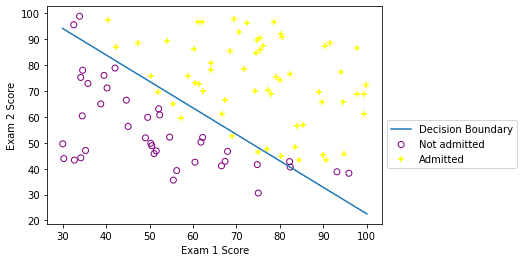

In [22]:
plotDecisionBoundary(opt_theta, X,y)

We can now answer the question: 
    - Given new information about a student that did exam 1 and 2, what is the probability that he will be admited for the university?

In [23]:
# What is the probability of being admited for a student that has 45 on Exam 1 and 85 on Exam 2
# We will use our sigmoid function and out optimal thetas to reach a probability
prob = sigmoid(np.dot(np.array([1,45,85]).T, opt_theta))
print("Probability for student with 45 on Exam 1 and 85 on Exam2: {:.0%}".format(prob))

Probability for student with 45 on Exam 1 and 85 on Exam2: 78%


In [24]:
# Computing the Accuracy for out training Set
# I've added the thres parameter for us to see the effect of moving the threshold of considering a case a positive example
def predict(theta: np.array, 
            X: np.array, thres: float)-> np.array:
    #Add column of ones to the array 
    m = len(X)
    p = sigmoid(np.dot(X, opt_theta.T))
    p = np.where(p>= thres,1,0)
    return p

In [25]:
p = predict(opt_theta, X_extended, 0.5)

In [26]:
# Check the accuracy of our model 
print('We have got {:.0%} of the examples of the training set using a decision boundary of 50%'.format(sum(p == y)/100))

We have got 89% of the examples of the training set using a decision boundary of 50%


In [27]:
# What happens when we move our decision boundary?
p_new_boundary = predict(opt_theta, X_extended, 0.3)
# Check the accuracy of our model 
print('We have got {:.0%} of the examples of the training set using a decision boundary of 30%'.format(sum(p_new_boundary == y)/100))

We have got 92% of the examples of the training set using a decision boundary of 30%


In [28]:
# Moving the threshold of considering a case a positive example acts like moving the decision boundary "virtually" - Let's check which cases moved from one boundary from another
cases_that_moved = X[p_new_boundary!=p]

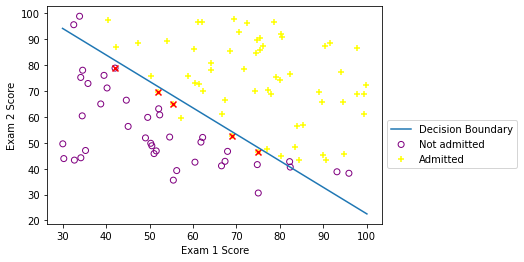

In [29]:
plotDecisionBoundary(opt_theta, X,y)
plt.scatter(cases_that_moved[:,0],cases_that_moved[:,1], marker='x', color='red')

# The red crosses show the cases that moved with a new threshold. 
# If we relax the threshold we are considering that less probable examples (those near the decision boundary) 
# are going to be marked as 1's

In [32]:
# What if we tighten our probability threshold?
p_new_boundary_2 = predict(opt_theta, X_extended, 0.8)
# Check the accuracy of our model 
print('We have got {:.0%} of the examples of the training set using a decision boundary of 30%'.format(sum(p_new_boundary_2 == y)/100))

We have got 86% of the examples of the training set using a decision boundary of 30%


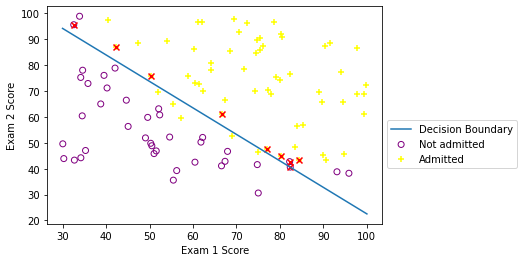

In [33]:
# Moving the threshold of considering a case a positive example acts like moving the decision boundary "virtually" - Let's check which cases moved from one boundary from another
other_cases_that_moved = X[p_new_boundary_2!=p]
plotDecisionBoundary(opt_theta, X,y)
plt.scatter(other_cases_that_moved[:,0],other_cases_that_moved[:,1], marker='x', color='red')

# The red crosses show the cases that moved with a new threshold. 
# If we tighten the threshold we are considering that more probable examples (those near the top of the decision boundary) 
# are going to be marked as 0's